# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2. Import Dataset

In [ ]:
# Load Iris dataset from sklearn
iris = load_iris()

# Create a DataFrame for easier data handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# 3. Data Cleaning (Check for Missing Values)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Since this dataset doesn't have missing values, no cleaning needed


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# 4. Visualize Data (Bar Chart, Pie Chart)

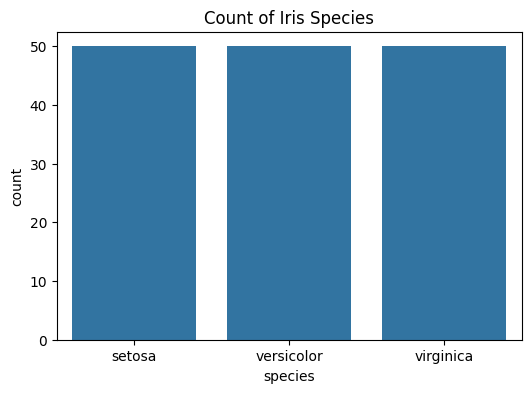

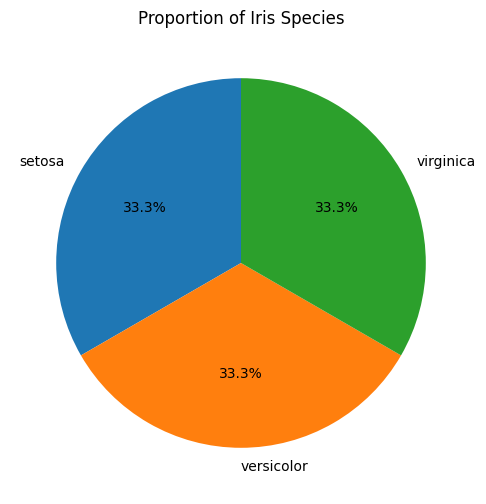

In [ ]:
# Bar chart - Count of each species
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title('Count of Iris Species')
plt.show()

# Pie chart - Proportion of each species
species_counts = df['species'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Iris Species')
plt.show()


# 5. Split Data into Training and Testing Sets

In [ ]:
# Features (all columns except 'species')
X = df.iloc[:, :-1]
print("Features (X) sample:")
print(X.head())

# Target variable
y = df['species']

# Encode target labels as numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nEncoded target labels (y_encoded) sample:")
print(y_encoded[:10])  # print first 10 encoded labels

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print shape of splits
print(f"\nShape of training features: {X_train.shape}")
print(f"Shape of testing features: {X_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")



Features (X) sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Encoded target labels (y_encoded) sample:
[0 0 0 0 0 0 0 0 0 0]

Shape of training features: (120, 4)
Shape of testing features: (30, 4)
Shape of training labels: (120,)
Shape of testing labels: (30,)


# 6. Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 7. Evaluate Model

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

